In [1]:
import numpy as np
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Explore

### datetime

In [3]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


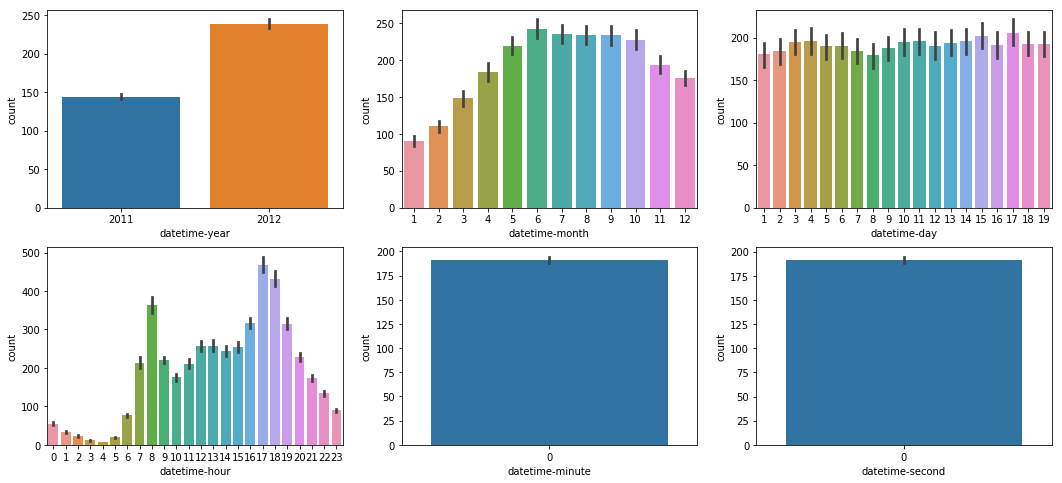

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

** Lesson Learned ** 
  * 2011년보다 2012년의 자전거 대여량이 더 높다.
  * 주로 여름(6월~8월)에 대여량이 높으며, 겨울(1월, 12월)에 대여량이 낮다.
  * 얼핏 보면 1월보다 12월의 대여량이 높은 것으로 보인다.
  * 주로 출근 시간(8시)과 퇴근 시간(17시~18시)에 많이 대여한다.
  * **datetime-minute**와 **datetime-second**는 기록되고 있지 않다. (그러므로 사용할 필요가 없다)
  * **datetime-day**는 1일 ~ 19일밖에 없다. (test데이터가 20일 ~ 31일을 보유하고 있다) 그러므로 이 컬럼을 사용해서는 안 된다.

### dayofweek

In [5]:
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


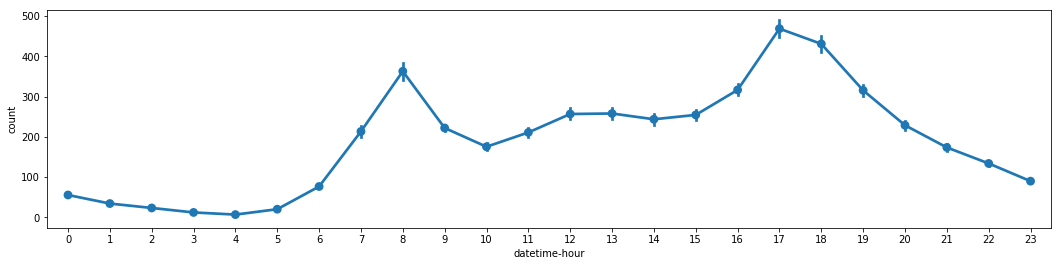

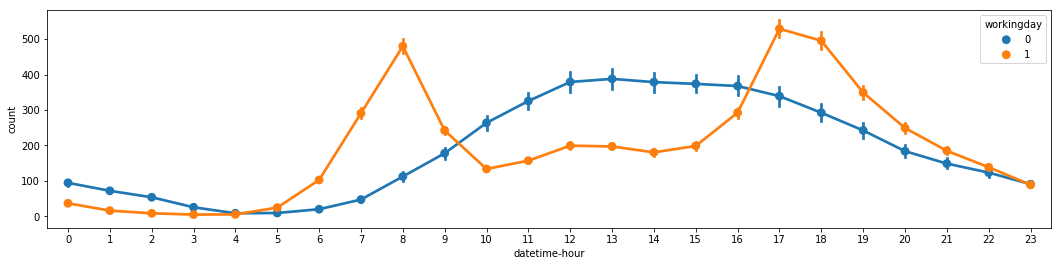

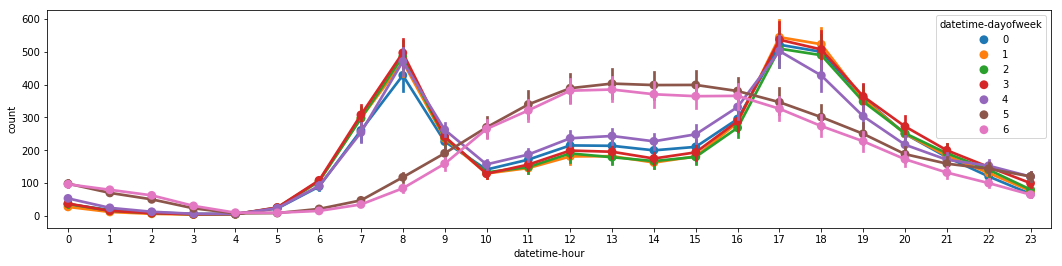

In [6]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)

figure, ax2 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax3)

** Lesson Learned **

  * 주중(workingday==0)에는 출퇴근 시간에, 주말(workingday==1)에는 오후에 많이 빌린다.
  * 금요일은 주중이지만 어느정도 주말의 속성을 보유하고 있다. (출퇴근 시간에 덜 빌리고, 오후에 더 빌린다)
  * 비슷하게 월요일도 주중이되 주말의 성향을 보유하고 있다.

### Concatenate year and month

In [7]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 20)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


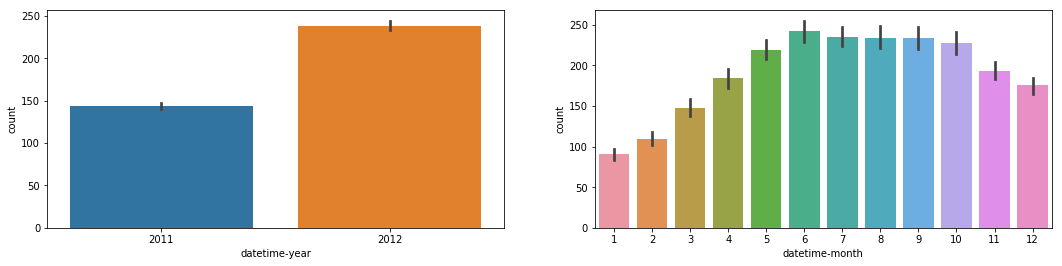

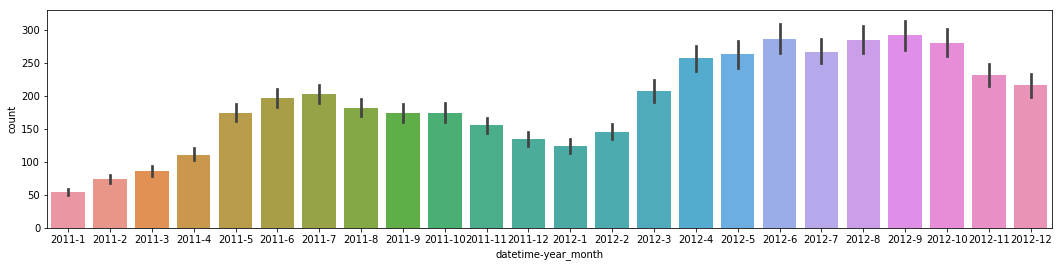

In [8]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

** Lesson Learned **
  * 자전거 대여량은 꾸준히 상승하고 있다.
  * 2011년 12월과 2012년 1월의 자전거 대여량은 비슷하다. 그러므로 12월이 1월보다 많이 빌린다고 볼 수는 없다.
  * 2012년은 6월에서 7월 사이 자전거 대여량이 감소하지만, 2011년은 7월부터 8월 사이에 자전거 대여량이 감소한다.

## Reload Dataset

In [9]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### Parse datetime

In [11]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


In [12]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(6493, 15)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0


### Concatenate year and month

In [13]:
def concatenate_year_and_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)
    
train["datetime-year_month"] = train["datetime"].apply(concatenate_year_and_month)

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-year_month"]].head()

(10886, 19)


,datetime,datetime-year,datetime-month,datetime-year_month
0,2011-01-01 00:00:00,2011,1,2011-1
1,2011-01-01 01:00:00,2011,1,2011-1
2,2011-01-01 02:00:00,2011,1,2011-1
3,2011-01-01 03:00:00,2011,1,2011-1
4,2011-01-01 04:00:00,2011,1,2011-1


In [14]:
test["datetime-year_month"] = test["datetime"].apply(concatenate_year_and_month)

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-year_month"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-year_month
0,2011-01-20 00:00:00,2011,1,2011-1
1,2011-01-20 01:00:00,2011,1,2011-1
2,2011-01-20 02:00:00,2011,1,2011-1
3,2011-01-20 03:00:00,2011,1,2011-1
4,2011-01-20 04:00:00,2011,1,2011-1


In [15]:
train_year_month = pd.get_dummies(train["datetime-year_month"], prefix="datetime")

print(train_year_month.shape)
train_year_month.head()

(10886, 24)


,datetime_2011-1,datetime_2011-10,datetime_2011-11,datetime_2011-12,datetime_2011-2,datetime_2011-3,datetime_2011-4,datetime_2011-5,datetime_2011-6,datetime_2011-7,...,datetime_2012-11,datetime_2012-12,datetime_2012-2,datetime_2012-3,datetime_2012-4,datetime_2012-5,datetime_2012-6,datetime_2012-7,datetime_2012-8,datetime_2012-9
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
test_year_month = pd.get_dummies(test["datetime-year_month"], prefix="datetime")

print(test_year_month.shape)
test_year_month.head()

(6493, 24)


,datetime_2011-1,datetime_2011-10,datetime_2011-11,datetime_2011-12,datetime_2011-2,datetime_2011-3,datetime_2011-4,datetime_2011-5,datetime_2011-6,datetime_2011-7,...,datetime_2012-11,datetime_2012-12,datetime_2012-2,datetime_2012-3,datetime_2012-4,datetime_2012-5,datetime_2012-6,datetime_2012-7,datetime_2012-8,datetime_2012-9
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
train = pd.concat([train, train_year_month], axis=1)

print(train.shape)
train.head()

(10886, 43)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime_2012-11,datetime_2012-12,datetime_2012-2,datetime_2012-3,datetime_2012-4,datetime_2012-5,datetime_2012-6,datetime_2012-7,datetime_2012-8,datetime_2012-9
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
test = pd.concat([test, test_year_month], axis=1)

print(test.shape)
test.head()

(6493, 40)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime_2012-11,datetime_2012-12,datetime_2012-2,datetime_2012-3,datetime_2012-4,datetime_2012-5,datetime_2012-6,datetime_2012-7,datetime_2012-8,datetime_2012-9
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,0,0,0,0,0,0,0,0


### Parse DayOfWeek

In [48]:
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 45)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


In [49]:
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime", "datetime-dayofweek"]].head()

(6493, 41)


,datetime,datetime-dayofweek
0,2011-01-20 00:00:00,3
1,2011-01-20 01:00:00,3
2,2011-01-20 02:00:00,3
3,2011-01-20 03:00:00,3
4,2011-01-20 04:00:00,3


In [53]:
train_dayofweek = pd.get_dummies(train["datetime-dayofweek"], prefix="datetime-dayofweek")

print(train_dayofweek.shape)
train_dayofweek.head()

(10886, 7)


,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


In [54]:
test_dayofweek = pd.get_dummies(test["datetime-dayofweek"], prefix="datetime-dayofweek")

print(test_dayofweek.shape)
test_dayofweek.head()

(6493, 7)


,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [56]:
train = pd.concat([train, train_dayofweek], axis=1)

print(train.shape)
train.head()

(10886, 52)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime_2012-9,prev-atemp,datetime-dayofweek,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,NaN,5,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,14.395,5,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,13.635,5,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,13.635,5,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,14.395,5,0,0,0,0,0,1,0


In [57]:
test = pd.concat([test, test_dayofweek], axis=1)

print(test.shape)
test.head()

(6493, 48)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime_2012-8,datetime_2012-9,datetime-dayofweek,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,0,3,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,3,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,0,3,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,3,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,0,3,0,0,0,1,0,0,0


## Score

In [58]:
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed", "datetime-hour"]

feature_names = feature_names + list(train_year_month.columns)
feature_names = feature_names + list(train_dayofweek.columns)

feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-hour',
 'datetime_2011-1',
 'datetime_2011-10',
 'datetime_2011-11',
 'datetime_2011-12',
 'datetime_2011-2',
 'datetime_2011-3',
 'datetime_2011-4',
 'datetime_2011-5',
 'datetime_2011-6',
 'datetime_2011-7',
 'datetime_2011-8',
 'datetime_2011-9',
 'datetime_2012-1',
 'datetime_2012-10',
 'datetime_2012-11',
 'datetime_2012-12',
 'datetime_2012-2',
 'datetime_2012-3',
 'datetime_2012-4',
 'datetime_2012-5',
 'datetime_2012-6',
 'datetime_2012-7',
 'datetime_2012-8',
 'datetime_2012-9',
 'datetime-dayofweek_0',
 'datetime-dayofweek_1',
 'datetime-dayofweek_2',
 'datetime-dayofweek_3',
 'datetime-dayofweek_4',
 'datetime-dayofweek_5',
 'datetime-dayofweek_6']

In [59]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 40)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-hour,datetime_2011-1,...,datetime_2012-7,datetime_2012-8,datetime_2012-9,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,1,0,0,1,9.84,14.395,81,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,9.02,13.635,80,0.0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,9.02,13.635,80,0.0,2,1,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,1,9.84,14.395,75,0.0,3,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,1,9.84,14.395,75,0.0,4,1,...,0,0,0,0,0,0,0,0,1,0


In [60]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 40)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-hour,datetime_2011-1,...,datetime_2012-7,datetime_2012-8,datetime_2012-9,datetime-dayofweek_0,datetime-dayofweek_1,datetime-dayofweek_2,datetime-dayofweek_3,datetime-dayofweek_4,datetime-dayofweek_5,datetime-dayofweek_6
0,1,0,1,1,10.66,11.365,56,26.0027,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,1,1,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,3,1,...,0,0,0,0,0,0,1,0,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,4,1,...,0,0,0,0,0,0,1,0,0,0


In [34]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [61]:
from sklearn.ensemble import RandomForestRegressor

seed = 37

model = RandomForestRegressor(random_state=seed)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=37,
           verbose=0, warm_start=False)

** Score ** = Root Mean Squared Logarithmic Error, RMSLE.

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [62]:
from sklearn.metrics import make_scorer
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)

    difference = log_predict - log_actual
    square_difference = difference ** 2
    mean_square_difference = square_difference.mean()
    
    score = np.sqrt(mean_square_difference)
    
    return score

print(rmsle([1, 2, 3], [1, 2, 3]))
print(rmsle([1, 2, 3], [2, 3, 4]))
print(rmsle([1, 2, 3], [1, 4, 9]))

rmsle_score = make_scorer(rmsle)
rmsle_score

0.0
0.314619332526
0.605676350101


make_scorer(rmsle)

In [63]:
from sklearn.cross_validation import cross_val_score

score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmsle_score).mean()

print("Score = {0:.5f}".format(score))

Score = 0.44753


## Submit

In [64]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=37,
           verbose=0, warm_start=False)

In [65]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions[:3]

(6493,)


array([ 9.9,  5.4,  2.9])

In [67]:
submission = pd.read_csv("data/sampleSubmission.csv")

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,9.9
1,2011-01-20 01:00:00,5.4
2,2011-01-20 02:00:00,2.9
3,2011-01-20 03:00:00,4.0
4,2011-01-20 04:00:00,3.0


In [68]:
submission.to_csv("beat-the-top-25p.csv", index=False)